In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

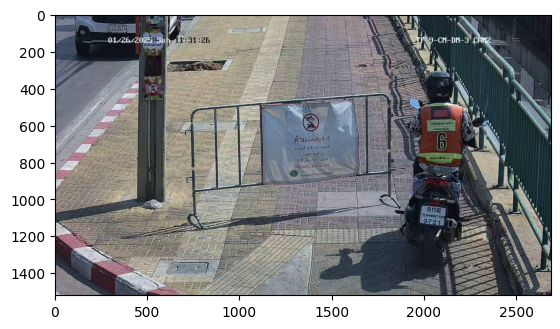

In [ ]:
img_path = "/content/fefbed0113ba79c5dd600eb93266174d.jpeg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
IMG_SIZE = 384

plt.imshow(img)
plt.show()

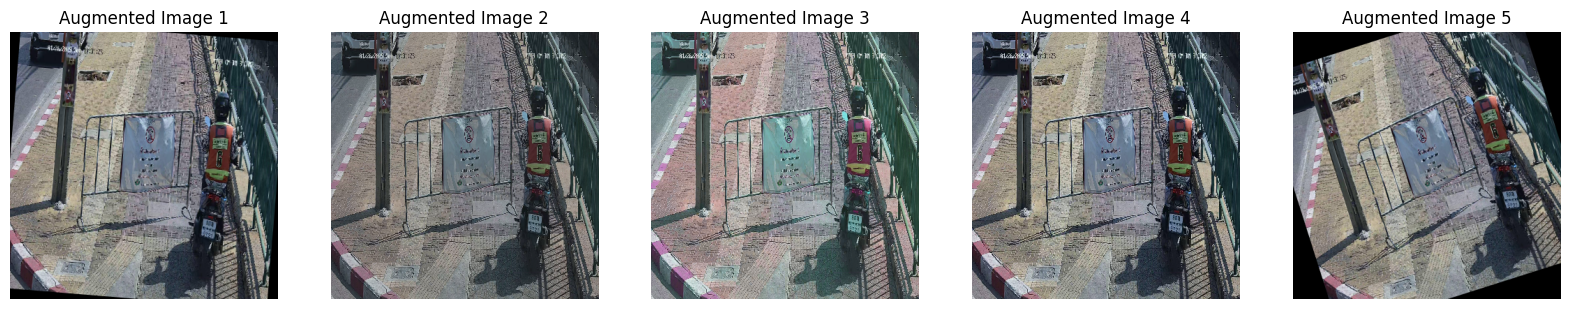

In [ ]:
transform_train = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Rotate(limit=20),
    A.HorizontalFlip(p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.8),
    A.RandomCrop(width=IMG_SIZE, height=IMG_SIZE),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

# Apply augmentation multiple times to visualize different outputs
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    augmented = transform_train(image=img)['image'].permute(1, 2, 0).cpu().numpy()
    augmented = np.clip((augmented * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406]), 0, 1)  # Denormalize
    axes[i].imshow(augmented)
    axes[i].axis("off")
    axes[i].set_title(f"Augmented Image {i+1}")

plt.show()